<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import data
from google.colab import files
uploaded = files.upload()

Saving avg_rainfalltemp in UK - Sheet1.csv to avg_rainfalltemp in UK - Sheet1.csv


In [13]:
import io
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [14]:
data = pd.read_csv(io.BytesIO(uploaded['avg_rainfalltemp in UK - Sheet1.csv']), encoding= 'latin-1')
data.head(n=10)

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,APR,21.4,8.2
4,2010,Monthly,MAY,22.1,9.8
5,2010,Monthly,JUN,42.7,14.3
6,2010,Monthly,JUL,61.1,16.4
7,2010,Monthly,AUG,76.6,14.6
8,2010,Monthly,SEP,83.9,13.4
9,2010,Monthly,OCT,65.0,9.6


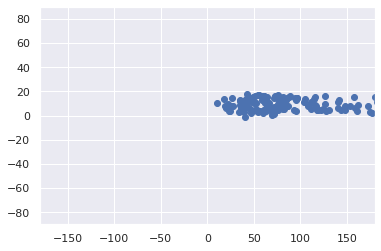

In [15]:
plt.scatter(data['Avg rainfall(in mm)'],data['Avg temp(in centigrade)'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [17]:
x = data.iloc[:,3:5]
x

,Avg rainfall(in mm),Avg temp(in centigrade)
0,69.5,0.80
1,71.7,1.60
2,65.1,5.50
3,21.4,8.20
4,22.1,9.80
...,...,...
165,130.4,4.89
166,162.1,8.38
167,279.0,15.67
168,344.4,9.26


In [18]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [19]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1], dtype=int32)

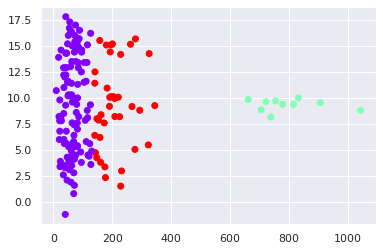

In [21]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Avg rainfall(in mm)'],data_with_clusters['Avg temp(in centigrade)'],c=data_with_clusters['Clusters'],cmap='rainbow')